# Convolutional Neural Network

### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
import numpy as np
import pandas as pd

# Step 1: Load the CSV dataset
dataset_path = '/content/drive/MyDrive/datasets/train.csv'  # Replace with the actual path to your dataset CSV file
df = pd.read_csv(dataset_path)

# Extract the pixel values and labels from the DataFrame
pixel_values = df.drop('label', axis=1).values
labels = df['label'].values
print("Shape of preprocessed data before:", pixel_values.shape)

# Step 2: Preprocess the data
pixel_values = pixel_values / 255.0  # Normalize the pixel values between 0 and 1

# Reshape the pixel values to their original 2D image format (28x28)
pixel_values = pixel_values.reshape(-1, 28, 28, 1)  # Assumes grayscale images

# Print the shape of the preprocessed data
print("Shape of preprocessed data after:", pixel_values.shape)


Shape of preprocessed data before: (42000, 784)
Shape of preprocessed data after: (42000, 28, 28, 1)


### Preprocessing the Test set

In [ ]:
import numpy as np
import pandas as pd

# Step 1: Load the CSV dataset
test_dataset_path = '/content/drive/MyDrive/datasets/test.csv'  # Replace with the actual path to your dataset CSV file
test_df = pd.read_csv(test_dataset_path)

# Extract the pixel values and labels from the DataFrame
test_pixel_values = test_df.values

print("Shape of preprocessed data before:", test_pixel_values.shape)

# Step 2: Preprocess the data
test_pixel_values = test_pixel_values / 255.0  # Normalize the pixel values between 0 and 1

# Reshape the pixel values to their original 2D image format (28x28)
test_pixel_values = test_pixel_values.reshape(-1, 28, 28, 1)  # Assumes grayscale images

# Print the shape of the preprocessed data
print("Shape of preprocessed data after:", test_pixel_values.shape)


Shape of preprocessed data before: (28000, 784)
Shape of preprocessed data after: (28000, 28, 28, 1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 2 - Building the CNN

# Test Train division

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pixel_values, labels, test_size=0.2, random_state=42)

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening before last layer

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# sigmoid ? only with binary output

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epochs ? batch size ?

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
model = cnn.fit(x=x_train, y=y_train, epochs=1)

1050/1050 [==============================] - 48s 43ms/step - loss: 0.2124 - accuracy: 0.9348


## Part 4 - Making a single prediction

In [ ]:
predictions = cnn.predict(x_test)

263/263 [==============================] - 3s 13ms/step


In [ ]:
predictions

array([[1.3192793e-04, 4.0740168e-05, 5.3068353e-03, ..., 1.2966970e-06,
        9.9404627e-01, 6.5025910e-05],
       [7.7568284e-06, 9.9876881e-01, 1.8321635e-04, ..., 3.3500616e-04,
        2.7907809e-04, 6.5101536e-05],
       [1.4032733e-07, 3.6125911e-07, 1.0535601e-07, ..., 2.9010093e-04,
        9.1778420e-06, 9.9908221e-01],
       ...,
       [8.3554186e-10, 9.9827048e-07, 4.8737263e-07, ..., 3.2199100e-08,
        2.1861595e-06, 5.0250246e-06],
       [9.9821460e-01, 2.4416149e-09, 2.7525088e-05, ..., 3.7121407e-07,
        2.7550979e-07, 2.7362243e-05],
       [9.5370769e-06, 1.8384413e-06, 9.1254587e-06, ..., 1.6899675e-03,
        1.5449255e-04, 9.9691123e-01]], dtype=float32)

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([8, 1, 9, ..., 3, 0, 9])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_labels)

In [ ]:
accuracy

0.9789285714285715

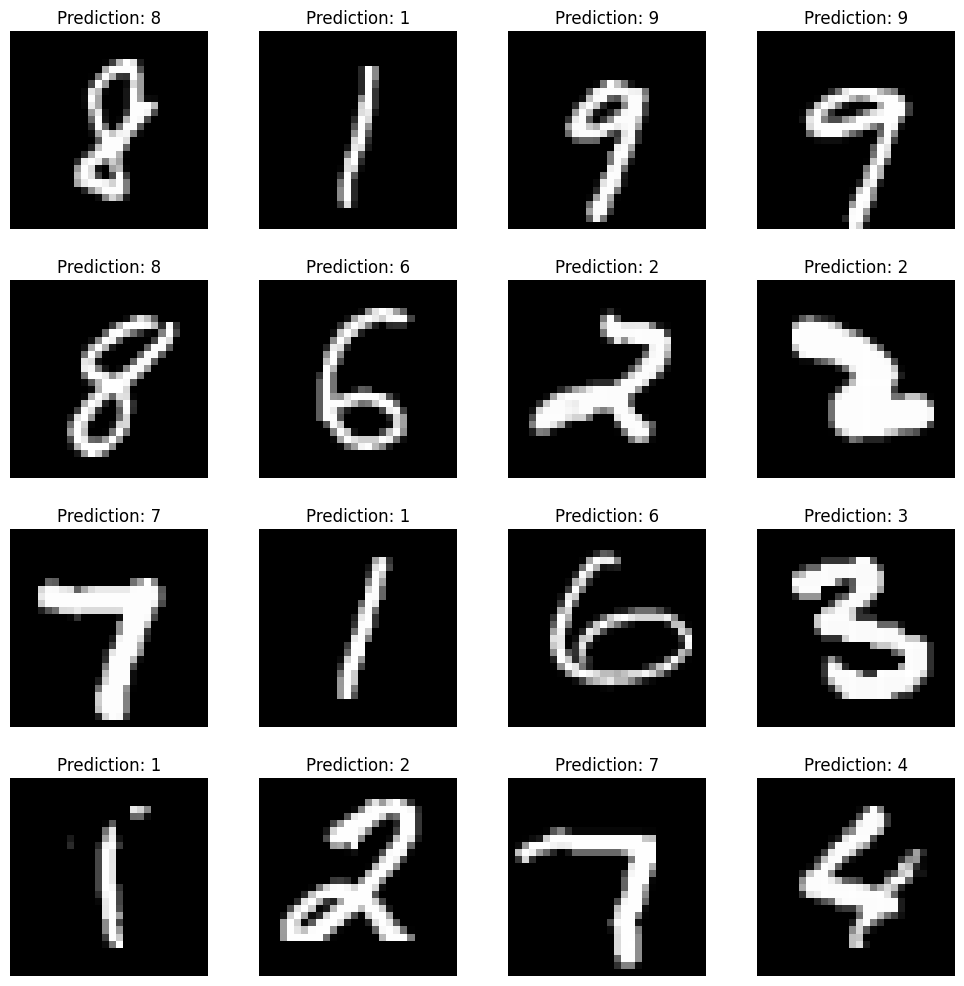

In [ ]:
import matplotlib.pyplot as plt

# Assuming pixel_values contains the preprocessed pixel values of the test dataset
# predicted_labels contains the predicted labels for the test dataset

# Configure the plot settings
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
fig.tight_layout(pad=0.3)
axs = axs.flatten()

# Visualize the images with their predictions
for i in range(len(axs)):
    # Reshape the pixel values to 28x28
    image = x_test[i].reshape(28, 28)

    # Display the image
    axs[i].imshow(image, cmap='gray')
    axs[i].axis('off')

    # Add the predicted label as the title
    axs[i].set_title(f"Prediction: {predicted_labels[i]}")

# Show the plot
plt.show()

To submit to DataCamp, I need to run it on the test.csv file.